In [3]:
!pip install transformers langchain flask streamlit


     ---------------------------------------- 0.0/42.9 kB ? eta -:--:--
     ---------------------------------------- 42.9/42.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.1/1.0 MB 4.3 MB/s eta 0:00:01
   ---------- ----------------------------- 0.3/1.0 MB 3.3 MB/s eta 0:00:01
   --------------- ------------------------ 0.4/1.0 MB 2.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.5/1.0 MB 2.9 MB/s eta 0:00:01
   ------------------------- -------------- 0.6/1.0 MB 2.9 MB/s eta 0:00:01
   ------------------------------ --------- 0.8/1.0 MB 2.9 MB/s eta 0:00:01
   ------------------------------------ --- 0.9/1.0 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/411.6 kB ? eta -:--:--
   ------------- -------------------------- 143.4/411.6 kB 2.8 MB/s eta 0:00:01
   -----------------

In [5]:
!pip install PyPDF2


In [9]:
import requests
from PyPDF2 import PdfReader
import os

# Function to download the PDF
def download_pdf(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, "wb") as file:
            file.write(response.content)
        print(f"PDF downloaded successfully to {save_path}")
    else:
        print(f"Failed to download PDF: {response.status_code}")

# Function to extract text from a PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        reader = PdfReader(pdf_path)
        for page in reader.pages:
            text += page.extract_text()
        return text
    except Exception as e:
        print(f"Failed to extract text from PDF: {e}")
        return None

# Main script
if __name__ == "__main__":
    # PDF URL and local save path
    pdf_url = "https://arxiv.org/pdf/2410.23303"
    pdf_save_path = "crawled_article.pdf"
    
    # Step 1: Download the PDF
    download_pdf(pdf_url, pdf_save_path)
    
    # Step 2: Extract text from the downloaded PDF
    print("Extracting text from PDF...")
    extracted_text = extract_text_from_pdf(pdf_save_path)
    
    if extracted_text:
        print("Extracted Text:")
        print(extracted_text[:500])  # Preview first 500 characters
        # Save extracted text to a file with utf-8 encoding
        with open("extracted_text.txt", "w", encoding="utf-8") as text_file:
            text_file.write(extracted_text)
        print("Extracted text saved to extracted_text.txt")



PDF downloaded successfully to crawled_article.pdf
Extracting text from PDF...
Extracted Text:
 Demonstrating Linked Battery Data  To Accelerate Knowledge Flow in Battery Science Philipp Dechentz1, Elias Barbers2, Simon Clark3, Susanne Lehner4, Brady Planden1, Masaki Adachi1, David A. Howey1,6, Sabine Paarmann5 1 Department of Engineering Science, University of Oxford, OX1 3PJ, Oxford, UK 2 Helmholtz Institute Münster (HI MS), IMD-4, Forschungszentrum Jülich, Campus-Boulevard 89, 52066 Aachen, Germany 3 Battery Technology, SINTEF Industry, Bratsbergvegen 5, Trondheim 7031, Norway 4 Depart
Extracted text saved to extracted_text.txt


In [5]:
def prepare_qa_pairs_from_text(text):
    # Split text into smaller sections for QA generation
    sections = text.split("\n\n")
    qa_pairs = []
    for i, section in enumerate(sections[:10]):  # Process first 10 sections
        qa_pairs.append({
            "question": f"What is discussed in section {i+1}?",
            "answer": section.strip()
        })
    return qa_pairs

# Prepare QA pairs
qa_pairs = prepare_qa_pairs_from_text(extracted_text)

# Save QA pairs to JSON
import json
with open("qa_pairs.json", "w") as json_file:
    json.dump(qa_pairs, json_file, indent=4)
print("QA pairs saved to qa_pairs.json")


QA pairs saved to qa_pairs.json


In [7]:
import json

# Load the JSON file
with open("qa_pairs.json", "r") as file:
    qa_pairs = json.load(file)

# Display the data
print("Sample QA Pairs:")
for i, pair in enumerate(qa_pairs[:1]):  # Show the first 5 pairs
    print(f"\nPair {i + 1}:")
    print(f"Question: {pair['question']}")
    print(f"Answer: {pair['answer']}")


Sample QA Pairs:

Pair 1:
Question: What is discussed in section 1?
Answer: Demonstrating Linked Battery Data  To Accelerate Knowledge Flow in Battery Science Philipp Dechentz1, Elias Barbers2, Simon Clark3, Susanne Lehner4, Brady Planden1, Masaki Adachi1, David A. Howey1,6, Sabine Paarmann5 1 Department of Engineering Science, University of Oxford, OX1 3PJ, Oxford, UK 2 Helmholtz Institute Münster (HI MS), IMD-4, Forschungszentrum Jülich, Campus-Boulevard 89, 52066 Aachen, Germany 3 Battery Technology, SINTEF Industry, Bratsbergvegen 5, Trondheim 7031, Norway 4 Department Elektrotechnik-Elektronik-Informationstechnik (EEI), Friedrich-Alexander-Universität Erlangen-Nürnberg, Cauerstraße 9, 91058, Erlangen, Germany 5 Department of Mechanical Engineering, Imperial College London, UK. 6 Faraday Institution, Quad One, Harwell Campus, Becquerel Ave, Didcot OX11 0RA, UK. z Corresponding author philipp.dechent@gmail.com  Abstract Batteries are pivotal for transitioning to a climate-friendly f

In [11]:
!pip install requests beautifulsoup4 PyPDF2


In [3]:
# Debug: Print the raw HTML content of the search results page
response = requests.get("https://arxiv.org/search/?query=battery&searchtype=all&source=header")
print(response.status_code)  # Should be 200
print(response.text[:1000])  # Preview the first 1000 characters of the HTML


200
<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8"/>
<meta name="viewport" content="width=device-width, initial-scale=1"/>
<!-- new favicon config and versions by realfavicongenerator.net -->
<link rel="apple-touch-icon" sizes="180x180" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/apple-touch-icon.png">
<link rel="icon" type="image/png" sizes="32x32" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon-32x32.png">
<link rel="icon" type="image/png" sizes="16x16" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon-16x16.png">
<link rel="manifest" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/site.webmanifest">
<link rel="mask-icon" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/safari-pinned-tab.svg" color="#b31b1b">
<link rel="shortcut icon" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon.ico">
<meta name="msapplication-TileColor" content="#b31b1b">
<

In [13]:
import os
import requests
from bs4 import BeautifulSoup
from PyPDF2 import PdfReader

# Step 1: Create directories for PDFs and extracted text
os.makedirs("pdfs", exist_ok=True)
os.makedirs("extracted_text", exist_ok=True)

# Step 2: Crawl ArXiv for PDF links
def crawl_arxiv(search_query, max_papers=5):
    base_url = "https://arxiv.org/search/"
    query_params = {
        "query": search_query,
        "searchtype": "all",
        "source": "header"
    }
    pdf_links = []

    # Send search request to ArXiv
    response = requests.get(base_url, params=query_params)
    if response.status_code != 200:
        print("Failed to access ArXiv search page.")
        return pdf_links

    soup = BeautifulSoup(response.text, "html.parser")
    results = soup.find_all("li", class_="arxiv-result")[:max_papers]
    
    for result in results:
        # Extract the PDF link
        pdf_link_tag = result.find("a", string="pdf")
        if pdf_link_tag:
            pdf_url = pdf_link_tag["href"]
            # Fix URL if it does not start with "http"
            if not pdf_url.startswith("http"):
                pdf_url = "https://arxiv.org" + pdf_url
            pdf_links.append(pdf_url)

    print(f"Found {len(pdf_links)} PDFs.")
    return pdf_links

# Step 3: Download PDFs
def download_pdfs(pdf_links):
    for idx, pdf_url in enumerate(pdf_links, start=1):
        try:
            response = requests.get(pdf_url)
            pdf_path = os.path.join("pdfs", f"paper_{idx}.pdf")
            with open(pdf_path, "wb") as file:
                file.write(response.content)
            print(f"Downloaded: {pdf_url} -> {pdf_path}")
        except Exception as e:
            print(f"Failed to download {pdf_url}: {e}")

# Step 4: Extract text from PDFs
def extract_text_from_pdfs():
    pdf_files = [f for f in os.listdir("pdfs") if f.endswith(".pdf")]
    for pdf_file in pdf_files:
        pdf_path = os.path.join("pdfs", pdf_file)
        text_path = os.path.join("extracted_text", pdf_file.replace(".pdf", ".txt"))
        
        try:
            reader = PdfReader(pdf_path)
            with open(text_path, "w", encoding="utf-8") as text_file:
                for page in reader.pages:
                    text_file.write(page.extract_text())
            print(f"Extracted text: {pdf_path} -> {text_path}")
        except Exception as e:
            print(f"Failed to extract text from {pdf_path}: {e}")

# Step 5: Main function
def main():
    search_query = "Lithium battery"
    max_papers = 5  # Number of papers to crawl and download

    print("Crawling ArXiv for PDFs...")
    pdf_links = crawl_arxiv(search_query, max_papers)

    print("Downloading PDFs...")
    download_pdfs(pdf_links)

    print("Extracting text from PDFs...")
    extract_text_from_pdfs()

    print("Process completed. Check 'pdfs/' and 'extracted_text/' directories.")

if __name__ == "__main__":
    main()


Crawling ArXiv for PDFs...
Found 5 PDFs.
Downloaded: https://arxiv.org/pdf/2412.17234 -> pdfs\paper_1.pdf
Downloaded: https://arxiv.org/pdf/2412.17105 -> pdfs\paper_2.pdf
Downloaded: https://arxiv.org/pdf/2412.16367 -> pdfs\paper_3.pdf
Downloaded: https://arxiv.org/pdf/2412.16324 -> pdfs\paper_4.pdf
Downloaded: https://arxiv.org/pdf/2412.13200 -> pdfs\paper_5.pdf
Extracting text from PDFs...
Extracted text: pdfs\paper_1.pdf -> extracted_text\paper_1.txt
Extracted text: pdfs\paper_2.pdf -> extracted_text\paper_2.txt
Extracted text: pdfs\paper_3.pdf -> extracted_text\paper_3.txt
Extracted text: pdfs\paper_4.pdf -> extracted_text\paper_4.txt
Extracted text: pdfs\paper_5.pdf -> extracted_text\paper_5.txt
Process completed. Check 'pdfs/' and 'extracted_text/' directories.


In [15]:
def clean_extracted_text():
    for text_file in os.listdir("extracted_text"):
        text_path = os.path.join("extracted_text", text_file)
        with open(text_path, "r", encoding="utf-8") as file:
            text = file.read()
        
        # Basic cleaning
        cleaned_text = text.replace("\n", " ").strip()
        
        # Save cleaned text
        with open(text_path, "w", encoding="utf-8") as file:
            file.write(cleaned_text)
        print(f"Cleaned: {text_path}")

clean_extracted_text()


Cleaned: extracted_text\paper_1.txt
Cleaned: extracted_text\paper_2.txt
Cleaned: extracted_text\paper_3.txt
Cleaned: extracted_text\paper_4.txt
Cleaned: extracted_text\paper_5.txt


In [17]:
import json

def generate_qa_pairs():
    qa_pairs = []
    for text_file in os.listdir("extracted_text"):
        text_path = os.path.join("extracted_text", text_file)
        with open(text_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Split text into paragraphs or sections
        sections = text.split(". ")
        for i, section in enumerate(sections[:10]):  # Limit to 10 pairs per file
            qa_pairs.append({
                "question": f"What is discussed in section {i+1}?",
                "answer": section.strip()
            })

    # Save QA pairs to a JSON file
    with open("qa_pairs.json", "w", encoding="utf-8") as json_file:
        json.dump(qa_pairs, json_file, indent=4)
    print("QA pairs saved to qa_pairs.json")

generate_qa_pairs()


QA pairs saved to qa_pairs.json


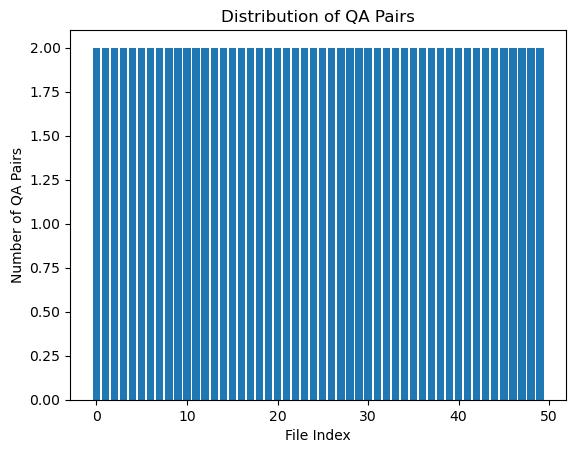

In [19]:
import matplotlib.pyplot as plt

# Example: Visualize number of QA pairs per file
qa_pairs = json.load(open("qa_pairs.json", "r"))
num_pairs = [len(file) for file in qa_pairs]
plt.bar(range(len(num_pairs)), num_pairs)
plt.xlabel("File Index")
plt.ylabel("Number of QA Pairs")
plt.title("Distribution of QA Pairs")
plt.show()


In [16]:
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
response = requests.get("https://arxiv.org/search/?query=battery&searchtype=all&source=header", headers=headers)


In [17]:
print(response.text[:1000])  # Print the first 1000 characters of the response


<!DOCTYPE html>
<html lang="en">
  <head>
    <meta charset="utf-8"/>
<meta name="viewport" content="width=device-width, initial-scale=1"/>
<!-- new favicon config and versions by realfavicongenerator.net -->
<link rel="apple-touch-icon" sizes="180x180" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/apple-touch-icon.png">
<link rel="icon" type="image/png" sizes="32x32" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon-32x32.png">
<link rel="icon" type="image/png" sizes="16x16" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon-16x16.png">
<link rel="manifest" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/site.webmanifest">
<link rel="mask-icon" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/safari-pinned-tab.svg" color="#b31b1b">
<link rel="shortcut icon" href="https://static.arxiv.org/static/base/1.0.0a5/images/icons/favicon.ico">
<meta name="msapplication-TileColor" content="#b31b1b">
<meta

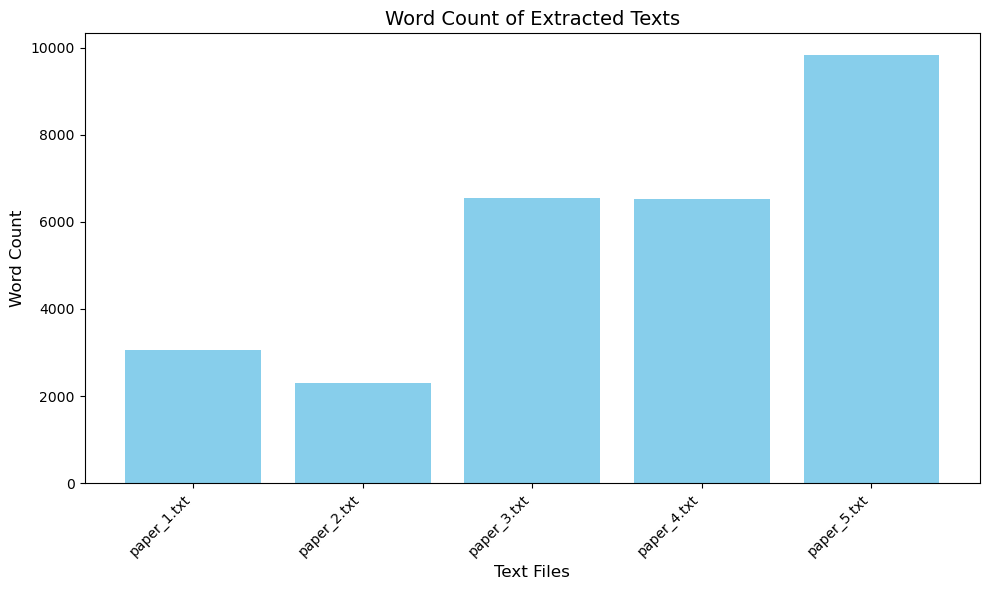

In [21]:
import os
import matplotlib.pyplot as plt

# Step 1: Define the directory containing extracted text
extracted_text_dir = "extracted_text"

# Step 2: Count words in each text file
file_names = []
word_counts = []

for text_file in os.listdir(extracted_text_dir):
    text_path = os.path.join(extracted_text_dir, text_file)
    if text_file.endswith(".txt"):
        with open(text_path, "r", encoding="utf-8") as file:
            text = file.read()
            word_count = len(text.split())  # Count words
            file_names.append(text_file)  # Save file name
            word_counts.append(word_count)  # Save word count

# Step 3: Plot word counts
plt.figure(figsize=(10, 6))
plt.bar(file_names, word_counts, color="skyblue")
plt.xlabel("Text Files", fontsize=12)
plt.ylabel("Word Count", fontsize=12)
plt.title("Word Count of Extracted Texts", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

# Save the plot
#plt.savefig("results/word_count_distribution.png")
plt.show()



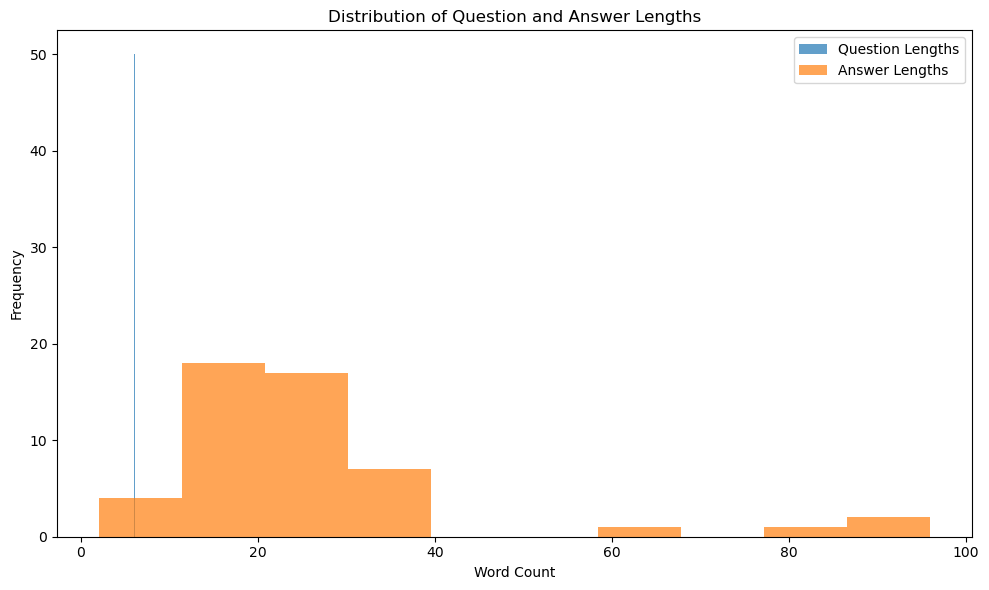

In [23]:
import matplotlib.pyplot as plt
import json

# Load QA pairs
qa_pairs_file = "qa_pairs.json"
with open(qa_pairs_file, "r", encoding="utf-8") as file:
    qa_pairs = json.load(file)

# Calculate statistics
num_qa_pairs = len(qa_pairs)
question_lengths = [len(qa['question'].split()) for qa in qa_pairs]
answer_lengths = [len(qa['answer'].split()) for qa in qa_pairs]

# Plot distribution of question and answer lengths
plt.figure(figsize=(10, 6))
plt.hist(question_lengths, bins=10, alpha=0.7, label="Question Lengths")
plt.hist(answer_lengths, bins=10, alpha=0.7, label="Answer Lengths")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Question and Answer Lengths")
plt.legend()
plt.tight_layout()

# Save and display plot
#plt.savefig("results/qa_pair_statistics.png")
plt.show()


In [27]:
import json

# Load QA pairs from JSON
qa_pairs_file = "qa_pairs.json"
qa_pairs_preview_file = "qa_pairs_preview.md"

with open(qa_pairs_file, "r", encoding="utf-8") as file:
    qa_pairs = json.load(file)

# Generate a Markdown file with a sample of QA pairs
with open(qa_pairs_preview_file, "w", encoding="utf-8") as md_file:
    md_file.write("# Sample QA Pairs\n\n")
    for i, qa in enumerate(qa_pairs[:10]):  # Limit to 10 pairs for preview
        md_file.write(f"### QA Pair {i+1}\n")
        md_file.write(f"- **Question**: {qa['question']}\n")
        md_file.write(f"- **Answer**: {qa['answer']}\n\n")

print(f"QA pairs preview saved to {qa_pairs_preview_file}")


QA pairs preview saved to qa_pairs_preview.md


In [28]:
'''
import os
import requests
from bs4 import BeautifulSoup
from PyPDF2 import PdfReader

# Step 1: Create directories for storing PDFs and extracted text
os.makedirs("pdfs", exist_ok=True)
os.makedirs("extracted_text", exist_ok=True)

# Step 2: Function to crawl Google Scholar for PDFs
def crawl_google_scholar(search_query, max_papers=5):
    base_url = "https://scholar.google.com/scholar"
    query_params = {"q": search_query}
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    pdf_links = []

    # Send search request to Google Scholar
    response = requests.get(base_url, params=query_params, headers=headers)
    if response.status_code != 200:
        print("Failed to access Google Scholar search page.")
        return pdf_links

    soup = BeautifulSoup(response.text, "html.parser")
    papers = soup.find_all("div", class_="gs_ri")[:max_papers]

    for paper in papers:
        # Locate the PDF link if available
        pdf_link_tag = paper.find("a", href=True)
        if pdf_link_tag and "pdf" in pdf_link_tag["href"]:
            pdf_links.append(pdf_link_tag["href"])

    print(f"Found {len(pdf_links)} PDFs.")
    return pdf_links

# Step 3: Function to download PDFs
def download_pdfs(pdf_links):
    for idx, pdf_url in enumerate(pdf_links, start=1):
        try:
            response = requests.get(pdf_url)
            pdf_path = os.path.join("pdfs", f"paper_{idx}.pdf")
            with open(pdf_path, "wb") as file:
                file.write(response.content)
            print(f"Downloaded: {pdf_url} -> {pdf_path}")
        except Exception as e:
            print(f"Failed to download {pdf_url}: {e}")

# Step 4: Function to extract text from PDFs
def extract_text_from_pdfs():
    pdf_files = [f for f in os.listdir("pdfs") if f.endswith(".pdf")]
    for pdf_file in pdf_files:
        pdf_path = os.path.join("pdfs", pdf_file)
        text_path = os.path.join("extracted_text", pdf_file.replace(".pdf", ".txt"))
        
        try:
            reader = PdfReader(pdf_path)
            with open(text_path, "w", encoding="utf-8") as text_file:
                for page in reader.pages:
                    text_file.write(page.extract_text())
            print(f"Extracted text: {pdf_path} -> {text_path}")
        except Exception as e:
            print(f"Failed to extract text from {pdf_path}: {e}")

# Step 5: Main function to orchestrate the process
def main():
    search_query = "battery research"
    max_papers = 5  # Number of papers to crawl and download

    print("Crawling Google Scholar for PDFs...")
    pdf_links = crawl_google_scholar(search_query, max_papers)

    print("Downloading PDFs...")
    download_pdfs(pdf_links)

    print("Extracting text from PDFs...")
    extract_text_from_pdfs()

    print("Process completed. Check 'pdfs/' and 'extracted_text/' directories.")

if __name__ == "__main__":
    main()
'''

'\nimport os\nimport requests\nfrom bs4 import BeautifulSoup\nfrom PyPDF2 import PdfReader\n\n# Step 1: Create directories for storing PDFs and extracted text\nos.makedirs("pdfs", exist_ok=True)\nos.makedirs("extracted_text", exist_ok=True)\n\n# Step 2: Function to crawl Google Scholar for PDFs\ndef crawl_google_scholar(search_query, max_papers=5):\n    base_url = "https://scholar.google.com/scholar"\n    query_params = {"q": search_query}\n    headers = {\n        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"\n    }\n    pdf_links = []\n\n    # Send search request to Google Scholar\n    response = requests.get(base_url, params=query_params, headers=headers)\n    if response.status_code != 200:\n        print("Failed to access Google Scholar search page.")\n        return pdf_links\n\n    soup = BeautifulSoup(response.text, "html.parser")\n    papers = soup.find_all("div", class_="gs_ri")[:max_papers]

In [37]:
import nltk
import os

# Set a custom NLTK data directory
nltk_data_dir = os.path.expanduser("~/nltk_data")  # Download resources to the user's home directory
os.makedirs(nltk_data_dir, exist_ok=True)
nltk.data.path.append(nltk_data_dir)

# Download required NLTK resources
nltk.download("punkt", download_dir=nltk_data_dir)
nltk.download("stopwords", download_dir=nltk_data_dir)
nltk.download("wordnet", download_dir=nltk_data_dir)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
print(nltk.data.path)


In [29]:
'''
import nltk
from nltk.corpus import wordnet

# Append the custom path
nltk.data.path.append('/usr/share/nltk_data')

# Test WordNet functionality
print(wordnet.synsets("battery"))
'''

'\nimport nltk\nfrom nltk.corpus import wordnet\n\n# Append the custom path\nnltk.data.path.append(\'/usr/share/nltk_data\')\n\n# Test WordNet functionality\nprint(wordnet.synsets("battery"))\n'

In [31]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter

import nltk
nltk.download()
# Download necessary resources for NLTK
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")


# Text preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r"[^a-zA-Z0-9.,!?\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text).strip()  # Normalize whitespace
    words = word_tokenize(text)  # Tokenization
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]  # Stemming
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatization
    return " ".join(words)

# Extract sections like Abstract, Introduction, References
def extract_sections(text):
    abstract = re.search(r"abstract(.*?)(introduction|1\s)", text, re.DOTALL | re.IGNORECASE)
    introduction = re.search(r"introduction(.*?)(\n\d+|methods|related work)", text, re.DOTALL | re.IGNORECASE)
    references = re.search(r"references(.*)$", text, re.DOTALL | re.IGNORECASE)
    return {
        "Abstract": abstract.group(1).strip() if abstract else "",
        "Introduction": introduction.group(1).strip() if introduction else "",
        "References": references.group(1).strip() if references else "",
    }

# Extract figures and tables
def extract_figures_and_tables(text):
    figures = re.findall(r"figure \d+", text, re.IGNORECASE)
    tables = re.findall(r"table \d+", text, re.IGNORECASE)
    return {"Figures": figures, "Tables": tables}

# Extract keywords
def extract_keywords(text):
    words = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_words = [word for word in words if word not in stop_words and len(word) > 3]
    word_counts = Counter(filtered_words)
    return word_counts.most_common(10)

# Process all extracted text files
def process_extracted_texts():
    extracted_dir = "extracted_text"
    results_dir = "results"
    os.makedirs(results_dir, exist_ok=True)

    for text_file in os.listdir(extracted_dir):
        text_path = os.path.join(extracted_dir, text_file)
        with open(text_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Preprocess text
        cleaned_text = preprocess_text(text)

        # Extract sections
        sections = extract_sections(text)

        # Extract figures and tables
        figures_tables = extract_figures_and_tables(text)

        # Extract keywords
        keywords = extract_keywords(cleaned_text)

        # Save results
        result_file = os.path.join(results_dir, f"{text_file}_processed.txt")
        with open(result_file, "w", encoding="utf-8") as result:
            result.write(f"Cleaned Text:\n{cleaned_text}\n\n")
            result.write(f"Sections:\n{sections}\n\n")
            result.write(f"Figures and Tables:\n{figures_tables}\n\n")
            result.write(f"Keywords:\n{keywords}\n\n")

        print(f"Processed: {text_file} -> {result_file}")

if __name__ == "__main__":
    print("Processing extracted texts...")
    process_extracted_texts()
    print("Processing completed. Check the 'results/' directory for outputs.")


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processing extracted texts...
Processed: paper_1.txt -> results\paper_1.txt_processed.txt
Processed: paper_2.txt -> results\paper_2.txt_processed.txt
Processed: paper_3.txt -> results\paper_3.txt_processed.txt
Processed: paper_4.txt -> results\paper_4.txt_processed.txt
Processed: paper_5.txt -> results\paper_5.txt_processed.txt
Processing completed. Check the 'results/' directory for outputs.


In [33]:
import os
import re
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK resources are available
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Advanced cleaning function
def advanced_cleaning(text):
    # Lowercase the text
    text = text.lower()

    # Fix common stemming/lemmatization issues (manual corrections)
    corrections = {
        "batteri": "battery",
        "energi": "energy",
        "accuraci": "accuracy",
        "ther": "thermal",
        "electr": "electrical",
        "fie": "identified"
    }
    for word, corrected in corrections.items():
        text = re.sub(rf"\b{word}\b", corrected, text)

    # Remove non-alphanumeric characters except for scientific terms and punctuation
    text = re.sub(r"[^a-zA-Z0-9.,\s]", "", text)

    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # Tokenize into sentences
    sentences = sent_tokenize(text)

    # Stopword removal
    stop_words = set(stopwords.words("english"))
    sentences = [
        " ".join(word for word in sentence.split() if word not in stop_words)
        for sentence in sentences
    ]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentences = [
        " ".join(lemmatizer.lemmatize(word) for word in sentence.split())
        for sentence in sentences
    ]

    # Join sentences back together
    cleaned_text = " ".join(lemmatized_sentences)

    return cleaned_text

# Process and re-clean all text files in the results folder
def re_clean_text_files(input_dir="results", output_dir="cleaned_results"):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Iterate through all text files in the input directory
    for text_file in os.listdir(input_dir):
        if text_file.endswith(".txt"):  # Only process .txt files
            input_path = os.path.join(input_dir, text_file)
            output_path = os.path.join(output_dir, text_file)

            # Read the original text file
            with open(input_path, "r", encoding="utf-8") as file:
                original_text = file.read()

            # Apply advanced cleaning
            cleaned_text = advanced_cleaning(original_text)

            # Save the cleaned text to the output directory
            with open(output_path, "w", encoding="utf-8") as cleaned_file:
                cleaned_file.write(cleaned_text)

            print(f"Processed and cleaned: {text_file} -> {output_path}")

# Main function to run the re-cleaning process
if __name__ == "__main__":
    print("Re-cleaning text files from the results folder...")
    re_clean_text_files()
    print("Re-cleaning completed. Check the 'cleaned_results' folder for outputs.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Re-cleaning text files from the results folder...
Processed and cleaned: paper_1.txt_processed.txt -> cleaned_results\paper_1.txt_processed.txt
Processed and cleaned: paper_2.txt_processed.txt -> cleaned_results\paper_2.txt_processed.txt
Processed and cleaned: paper_3.txt_processed.txt -> cleaned_results\paper_3.txt_processed.txt
Processed and cleaned: paper_4.txt_processed.txt -> cleaned_results\paper_4.txt_processed.txt
Processed and cleaned: paper_5.txt_processed.txt -> cleaned_results\paper_5.txt_processed.txt
Re-cleaning completed. Check the 'cleaned_results' folder for outputs.


In [35]:
import os
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK resources are available
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")

# Improved cleaning function
def improved_cleaning(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove special characters but retain periods and commas for sentence structure
    text = re.sub(r"[^a-zA-Z0-9.,\s]", "", text)

    # 3. Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()

    # 4. Tokenize sentences
    sentences = sent_tokenize(text)

    # 5. Tokenize words, remove stopwords, and apply lemmatization
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    cleaned_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        filtered_words = [
            lemmatizer.lemmatize(word) for word in words if word not in stop_words
        ]
        cleaned_sentences.append(" ".join(filtered_words))

    # 6. Reconstruct sentences for readability
    cleaned_text = ". ".join(cleaned_sentences)

    return cleaned_text

# Re-clean all text files in the `results` folder
def re_clean_text_files(input_dir="results", output_dir="refined_cleaned_results"):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for text_file in os.listdir(input_dir):
        if text_file.endswith(".txt"):  # Only process .txt files
            input_path = os.path.join(input_dir, text_file)
            output_path = os.path.join(output_dir, text_file)

            # Read the original text file
            with open(input_path, "r", encoding="utf-8") as file:
                original_text = file.read()

            # Apply improved cleaning
            cleaned_text = improved_cleaning(original_text)

            # Save the cleaned text to the output directory
            with open(output_path, "w", encoding="utf-8") as cleaned_file:
                cleaned_file.write(cleaned_text)

            print(f"Processed and cleaned: {text_file} -> {output_path}")

# Main function to orchestrate the cleaning
if __name__ == "__main__":
    print("Re-cleaning text files from the results folder...")
    re_clean_text_files()
    print("Re-cleaning completed. Check the 'refined_cleaned_results' folder for outputs.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Re-cleaning text files from the results folder...
Processed and cleaned: paper_1.txt_processed.txt -> refined_cleaned_results\paper_1.txt_processed.txt
Processed and cleaned: paper_2.txt_processed.txt -> refined_cleaned_results\paper_2.txt_processed.txt
Processed and cleaned: paper_3.txt_processed.txt -> refined_cleaned_results\paper_3.txt_processed.txt
Processed and cleaned: paper_4.txt_processed.txt -> refined_cleaned_results\paper_4.txt_processed.txt
Processed and cleaned: paper_5.txt_processed.txt -> refined_cleaned_results\paper_5.txt_processed.txt
Re-cleaning completed. Check the 'refined_cleaned_results' folder for outputs.


In [39]:
import os
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("stopwords")

def better_cleaning(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove special characters but retain sentence structure
    text = re.sub(r"[^a-zA-Z0-9.,\s]", "", text)

    # 3. Normalize spaces
    text = re.sub(r"\s+", " ", text).strip()

    # 4. Tokenize sentences for structure
    sentences = sent_tokenize(text)

    # 5. Word-level cleaning with lemmatization and stopword removal
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words("english"))
    cleaned_sentences = []

    for sentence in sentences:
        # Tokenize and lemmatize each word
        words = word_tokenize(sentence)
        cleaned_words = [
            lemmatizer.lemmatize(word)
            for word in words
            if word not in stop_words  # Remove stopwords
        ]
        # Reconstruct cleaned sentence
        cleaned_sentence = " ".join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence.capitalize())

    # 6. Reconstruct cleaned text with sentence boundaries
    cleaned_text = ". ".join(cleaned_sentences)

    return cleaned_text

# Process text files dynamically
def re_clean_text_files(input_dir="results", output_dir="refined_cleaned_results"):
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for text_file in os.listdir(input_dir):
        if text_file.endswith(".txt"):  # Only process .txt files
            input_path = os.path.join(input_dir, text_file)
            output_path = os.path.join(output_dir, text_file)

            # Read the original text
            with open(input_path, "r", encoding="utf-8") as file:
                original_text = file.read()

            # Apply better cleaning
            cleaned_text = better_cleaning(original_text)

            # Save the cleaned text
            with open(output_path, "w", encoding="utf-8") as cleaned_file:
                cleaned_file.write(cleaned_text)

            print(f"Processed and cleaned: {text_file} -> {output_path}")

if __name__ == "__main__":
    print("Processing and dynamically cleaning text files...")
    re_clean_text_files()
    print("Dynamic cleaning completed. Check the 'refined_cleaned_results' folder for outputs.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processing and dynamically cleaning text files...
Processed and cleaned: paper_1.txt_processed.txt -> refined_cleaned_results\paper_1.txt_processed.txt
Processed and cleaned: paper_2.txt_processed.txt -> refined_cleaned_results\paper_2.txt_processed.txt
Processed and cleaned: paper_3.txt_processed.txt -> refined_cleaned_results\paper_3.txt_processed.txt
Processed and cleaned: paper_4.txt_processed.txt -> refined_cleaned_results\paper_4.txt_processed.txt
Processed and cleaned: paper_5.txt_processed.txt -> refined_cleaned_results\paper_5.txt_processed.txt
Dynamic cleaning completed. Check the 'refined_cleaned_results' folder for outputs.


In [41]:
import os
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK resources are downloaded
nltk.download("punkt")
nltk.download("wordnet")

def refined_cleaning(text):
    # 1. Lowercasing
    text = text.lower()

    # 2. Remove special characters while keeping periods and commas
    text = re.sub(r"[^a-zA-Z0-9.,\s]", "", text)

    # 3. Normalize spaces
    text = re.sub(r"\s+", " ", text).strip()

    # 4. Fix split words (e.g., "ther mal" -> "thermal")
    text = re.sub(r"\b(\w+)\s+(\w+)\b", lambda m: m.group(1) + m.group(2) if len(m.group(1)) < 4 else m.group(0), text)

    # 5. Tokenize sentences
    sentences = sent_tokenize(text)

    # 6. Word-level processing with minimal lemmatization
    lemmatizer = WordNetLemmatizer()
    cleaned_sentences = []

    for sentence in sentences:
        words = word_tokenize(sentence)
        cleaned_words = [
            lemmatizer.lemmatize(word) for word in words
        ]
        cleaned_sentence = " ".join(cleaned_words)
        cleaned_sentences.append(cleaned_sentence.capitalize())

    # 7. Reconstruct cleaned text with proper punctuation
    cleaned_text = ". ".join(cleaned_sentences)

    return cleaned_text

# Process all text files in a directory
def re_clean_text_files(input_dir="results", output_dir="refined_cleaned_results"):
    os.makedirs(output_dir, exist_ok=True)

    for text_file in os.listdir(input_dir):
        if text_file.endswith(".txt"):
            input_path = os.path.join(input_dir, text_file)
            output_path = os.path.join(output_dir, text_file)

            # Read the original text
            with open(input_path, "r", encoding="utf-8") as file:
                original_text = file.read()

            # Apply refined cleaning
            cleaned_text = refined_cleaning(original_text)

            # Save the cleaned text
            with open(output_path, "w", encoding="utf-8") as cleaned_file:
                cleaned_file.write(cleaned_text)

            print(f"Processed and cleaned: {text_file} -> {output_path}")

if __name__ == "__main__":
    print("Processing and cleaning text files...")
    re_clean_text_files()
    print("Cleaning completed. Check the 'refined_cleaned_results' folder.")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yasir\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Processing and cleaning text files...
Processed and cleaned: paper_1.txt_processed.txt -> refined_cleaned_results\paper_1.txt_processed.txt
Processed and cleaned: paper_2.txt_processed.txt -> refined_cleaned_results\paper_2.txt_processed.txt
Processed and cleaned: paper_3.txt_processed.txt -> refined_cleaned_results\paper_3.txt_processed.txt
Processed and cleaned: paper_4.txt_processed.txt -> refined_cleaned_results\paper_4.txt_processed.txt
Processed and cleaned: paper_5.txt_processed.txt -> refined_cleaned_results\paper_5.txt_processed.txt
Cleaning completed. Check the 'refined_cleaned_results' folder.


In [45]:
import os
import re

def refined_light_cleaning(text):
    # 1. Fix broken words (e.g., "batter y" -> "battery")
    text = re.sub(r"(\w+)\s+-(\s+\w+)", r"\1-\2", text)  # Fix hyphenated breaks
    text = re.sub(r"(\w+)\s+(\w+)", lambda m: m.group(1) + m.group(2) if len(m.group(1)) < 4 else m.group(0), text)

    # 2. Remove extra spaces around punctuation
    text = re.sub(r"\s+([.,;!?])", r"\1", text)
    text = re.sub(r"([.,;!?])\s+", r"\1 ", text)

    # 3. Fix common issues with spaces in titles and section names
    text = re.sub(r"\b([A-Z][a-z]+)\s+&\s+([A-Z][a-z]+)\b", r"\1 & \2", text)  # Preserve titles like "Context & Scale"

    # 4. Normalize multiple spaces to a single space
    text = re.sub(r"\s+", " ", text).strip()

    return text

def clean_extracted_text(input_dir="extracted_text", output_dir="final_cleaned_text"):
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    for text_file in os.listdir(input_dir):
        if text_file.endswith(".txt"):
            input_path = os.path.join(input_dir, text_file)
            output_path = os.path.join(output_dir, text_file)

            # Read the original extracted text
            with open(input_path, "r", encoding="utf-8") as file:
                original_text = file.read()

            # Apply refined light cleaning
            cleaned_text = refined_light_cleaning(original_text)

            # Save the cleaned text
            with open(output_path, "w", encoding="utf-8") as cleaned_file:
                cleaned_file.write(cleaned_text)

            print(f"Processed and cleaned: {text_file} -> {output_path}")

if __name__ == "__main__":
    print("Processing and cleaning extracted text files...")
    clean_extracted_text()
    print("Cleaning completed. Check the 'final_cleaned_text' folder.")


Processing and cleaning extracted text files...
Processed and cleaned: paper_1.txt -> final_cleaned_text\paper_1.txt
Processed and cleaned: paper_2.txt -> final_cleaned_text\paper_2.txt
Processed and cleaned: paper_3.txt -> final_cleaned_text\paper_3.txt
Processed and cleaned: paper_4.txt -> final_cleaned_text\paper_4.txt
Processed and cleaned: paper_5.txt -> final_cleaned_text\paper_5.txt
Cleaning completed. Check the 'final_cleaned_text' folder.
